In [0]:
# pip install opencv-python==3.2.0.6
# pip install opencv-python==3.3.0.10 opencv-contrib-python==3.3.0.10

In [1]:
import cv2
cv2.__version__

'4.1.2'

In [0]:
import numpy as np
import os
from google.colab.patches import cv2_imshow
from matplotlib import pyplot as plt

In [0]:
def getDescriptorForFp1(inImgPath,listofTestImages,testPath,resultPath):

  img1 = cv2.imread(inImgPath,0) # trainImage
  # cv2_imshow(img1)
  
  for tstimage in listofTestImages:

    img2 = cv2.imread(testPath + tstimage,0) # trainImage
    
    print("Read Files",testPath + tstimage)

    # cv2_imshow(img2)

    MIN_MATCH_COUNT = 10

    #Create ORB Object and BF Object (using Hamming)

    #orb = cv2.ORB_create()

    orb = cv2.ORB_create(nfeatures=2500)

    print("Created orb descriptor")

    #Find Keypoints and Descriptors

    kpts1, descs1 = orb.detectAndCompute(img1, None)

    kpts2, descs2 = orb.detectAndCompute(img2, None)

    print ("Found Keypoints & Descriptors")

    

    #match descriptors and sort them in order of their distance

    bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=False)

    matches = bf.knnMatch(descs1, trainDescriptors = descs2, k=2)
    good = []

    good_without_list = []

    for m,n in matches:
        if m.distance < 0.75*n.distance:
            good.append([m])
            good_without_list.append(m)

    if len(good) > MIN_MATCH_COUNT:

        src_pts = np.float32([kpts1[m.queryIdx].pt for m in good_without_list]).reshape(-1,1,2)
        dst_pts = np.float32([kpts2[m.trainIdx].pt for m in good_without_list]).reshape(-1,1,2)
      
        M, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, 5.0)
        matchesMask = mask.ravel().tolist()
      
        h,w = img1.shape[:2]
        pts = np.float32([[0,0], [0,h-1], [w-1, h-1], [w-1,0]]).reshape(-1,1,2)
        dst = cv2.perspectiveTransform(pts,M)
      
        img2 = cv2.polylines(img2, [np.int32(dst)], True, (0,0,255),1 , cv2.LINE_AA)
        print ("The Same One!!")
    else:
        print ("Not Enough matches are found - %d%d" % (len(good), MIN_MATCH_COUNT))
        matchesMask = None

    draw_params = dict(matchColor = (0,255,0), # draw matches in green color
                    singlePointColor = None,
                    matchesMask = matchesMask, # draw only inliers
                    flags = 2)

    img3 = cv2.drawMatches(img1,kpts1,img2,kpts2,good_without_list,None,**draw_params)

    # plt.imshow(img3, 'gray'),plt.show()
    
    # '/content/drive/My Drive/Lennox/Results_fp2/NoMatch'
    print(resultPath+inImgPath.split(".")[0].split("/")[-1]+'-'+tstimage.split(".")[0])

    if(matchesMask != None):
      print('Matches Found')
      if not os.path.exists(resultPath+'Match'):
        os.makedirs(resultPath+'Match')
      ResultFinal=resultPath+'Match/'+inImgPath.split(".")[0].split("/")[-1]+'-'+'match'+tstimage.split(".")[0]+'.jpg'
      cv2.imwrite(ResultFinal,img3)
      print(os.listdir(resultPath+'Match/'))
      # ['Fingerprint','InputFrameid','Path_InFrameId','TestFrameId','Path_TestFrameId','Result','ResultPath'])
      df.loc[len(df)]=[Fingerprint,inImgPath.split(".")[0].split("/")[-1],inImgPath.split("Lennox/")[1],tstimage.split(".")[0],testPath.split("Lennox/")[1],'Match',ResultFinal.split("Lennox/")[1]] 
    else:
      print('No Matches Found')
      if not os.path.exists(resultPath+'NoMatch'):
        os.makedirs(resultPath+'NoMatch')
      cv2.imwrite(resultPath+'NoMatch/'+inImgPath.split(".")[0].split("/")[-1]+'-'+'Nomatch'+tstimage.split(".")[0]+'.jpg',img3) 


In [4]:
import pandas as pd
Fingerprint='2-1'
df = pd.DataFrame(columns=['Fingerprint','InputFrameid','Path_InFrameId','TestFrameId','Path_TestFrameId','Result','ResultPath'])
len(df)

0

In [5]:
# listofAssmblImages=os.listdir('/content/drive/My Drive/Lennox/CroppedAssembledImageswithFittings/CropFittings/')
listofAssmblImages=os.listdir('/content/drive/My Drive/Lennox/Phase1/crop/')
print(listofAssmblImages)
# AssembledCoilPath='/content/drive/My Drive/Lennox/CroppedAssembledImageswithFittings/CropFittings/'
AssembledCoilPath='/content/drive/My Drive/Lennox/Phase1/crop/'

# listofCropImages=os.listdir('/content/drive/My Drive/Lennox/CroppedAssembledImageswithFittings/ManualBrazing/')
listofCropImages=os.listdir('/content/drive/My Drive/Lennox/Phase2/crop/')
print(listofCropImages)
# CoilFilePath='/content/drive/My Drive/Lennox/CroppedAssembledImageswithFittings/ManualBrazing/'
CoilFilePath='/content/drive/My Drive/Lennox/Phase2/crop/'

resultPath='/content/drive/My Drive/Lennox/Results_fp2/'

['999_0_ph1.jpg', '981_0_ph1.jpg', '955_0_ph1.jpg', '72_0_ph1.jpg', '96_0_ph1.jpg', '73_0_ph1.jpg', '686_0_ph1.jpg', '685_0_ph1.jpg', '694_0_ph1.jpg', '695_0_ph1.jpg', '711_0_ph1.jpg', '719_0_ph1.jpg', '720_0_ph1.jpg', '703_0_ph1.jpg', '704_0_ph1.jpg', '729_0_ph1.jpg', '729_1_ph1.jpg', '741_0_ph1.jpg', '956_0_ph1.jpg', '971_0_ph1.jpg', '957_0_ph1.jpg']
['frame119_0_ph2.jpg', 'frame355_0_ph2.jpg', 'frame2302_0_ph2.jpg', 'frame4249_0_ph2.jpg', 'frame237_0_ph2.jpg', 'frame2125_0_ph2.jpg', 'frame3895_0_ph2.jpg', 'frame9677_0_ph2.jpg', 'frame11742_0_ph2.jpg', 'frame11801_0_ph2.jpg', 'frame13512_0_ph2.jpg', 'frame14161_0_ph2.jpg', 'frame15341_0_ph2.jpg', 'frame16049_0_ph2.jpg', 'frame18822_0_ph2.jpg', 'frame20002_0_ph2.jpg', 'frame21064_0_ph2.jpg', 'frame21418_0_ph2.jpg', 'frame23955_0_ph2.jpg', 'frame26551_0_ph2.jpg', 'frame26905_0_ph2.jpg']


In [6]:
for coilfile in listofCropImages:

  print(CoilFilePath+coilfile)
  InputPath=CoilFilePath+coilfile
  getDescriptorForFp1(InputPath,listofAssmblImages,AssembledCoilPath,resultPath)

Output hidden; open in https://colab.research.google.com to view.

In [0]:
df.head(5)
df.to_csv('/content/drive/My Drive/Lennox/Results_fp2/'+'Ph2_Ph1_matches.csv')

In [0]:
# os.chdir('/content/drive/My Drive/Lennox/Cropped Images/')
# path='/content/drive/My Drive/Lennox/Cropped Images/'

In [34]:
# listofImages=os.listdir()
# listofImages

['15_crop.jpg',
 '56_crop.jpg',
 '4_crop.jpg',
 '22_crop.jpg',
 '23_crop.jpg',
 '3_crop.jpg',
 '5_crop.jpg',
 '40_crop.jpg']

In [0]:
# img = cv2.imread('15_crop.jpg')
# gray= cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
# orb = cv2.ORB_create()
# # cv2.xfeatures2d.
# sift = cv2.xfeatures2d.SIFT_create()
# # sift = cv2.SIFT()
# kp = sift.detect(gray,None)
# img=cv2.drawKeypoints(gray,kp, np.array([]))
# # cv2.imwrite('sift_keypoints'+'15_crop.jpg',img)

In [0]:
# cv2_imshow(img)

In [0]:
# img2 = cv2.imread('15_crop.jpg')
# gray= cv2.cvtColor(img2,cv2.COLOR_BGR2GRAY)
# # Initiate ORB detector
# orb = cv2.ORB_create()
# # find the keypoints with ORB
# kp = orb.detect(img2,None)
# # compute the descriptors with ORB
# kp, des = orb.compute(img2, kp)
# # draw only keypoints location,not size and orientation
# img3 = cv2.drawKeypoints(img2, kp, None, color=(0,255,0), flags=0)
# # plt.imshow(img3), plt.show()
# cv2_imshow(img3)

In [0]:
# import cv2

# # defining feature extractor that we want to use
# extractor = cv2.xfeatures2d.SIFT_create()

# def features(image, extractor):
#     keypoints, descriptors = extractor.detectAndCompute(image, None)
#     return keypoints, descriptors

In [0]:
# preprocessed_image = []
# descriptor_list=[]
# for image in listofImages:
#       # image = gray(image)
#       img = cv2.imread(image)
#       img= cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
#       keypoint, descriptor = features(img, extractor)
#       if (descriptor is not None):
#           # histogram = build_histogram(descriptor, kmeans)
#           preprocessed_image.append(histogram)
#           descriptor_list.append(descriptor)

In [0]:
# from sklearn.cluster import KMeans

# kmeans = KMeans(n_clusters = 800)
# kmeans.fit(descriptor_list)


In [0]:
# # Initiate ORB detector
# orb = cv.ORB_create()
# # find the keypoints with ORB
# kp = orb.detect(img,None)
# # compute the descriptors with ORB
# kp, des = orb.compute(img, kp)
# # draw only keypoints location,not size and orientation
# img2 = cv.drawKeypoints(img, kp, None, color=(0,255,0), flags=0)
# plt.imshow(img2), plt.show()

In [0]:
# # img1 = cv2.imread('15_crop.jpg',0) # queryImage
# path='/content/drive/My Drive/Lennox/Cropped Images/'
# coilfile1='22_crop.jpg'
# img1 = cv2.imread(path+coilfile1,0) # queryImage

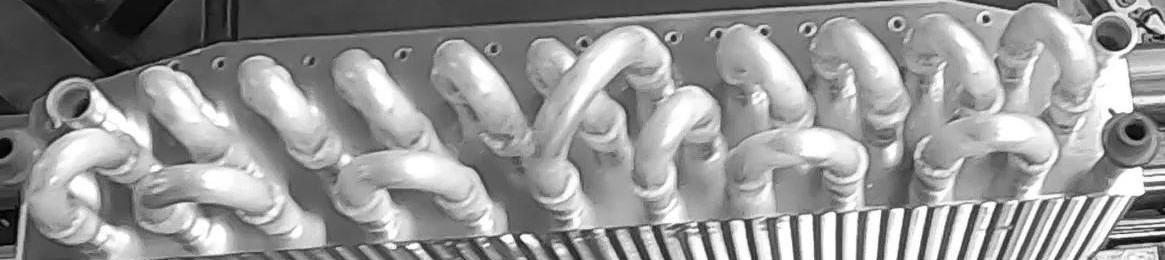

In [12]:
# cv2_imshow(img1)

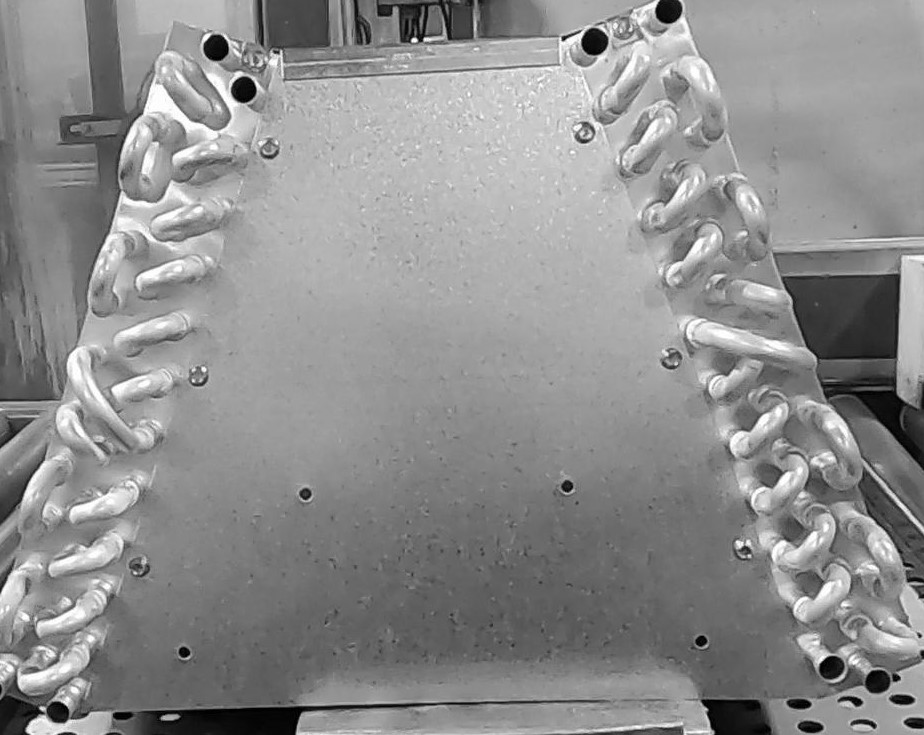

In [13]:
# img2 = cv2.imread('/content/drive/My Drive/Lennox/Cropped Assembled Images/'+'4_crop.jpg',0) # queryImage
# cv2_imshow(img2)

In [0]:
# listofTestImages=os.listdir('/content/drive/My Drive/Lennox/Cropped Assembled Images/')
# listofTestImages
# testPath='/content/drive/My Drive/Lennox/Cropped Assembled Images/'

In [0]:
# import numpy as np
# import cv2
# from matplotlib import pyplot as plt 

In [0]:
# for tstimage in listofTestImages:
#   img2 = cv2.imread(testPath + tstimage,0) # trainImage
#   # cv2_imshow(img2)
#   # cv2_imshow(img1)

#   # Initiate ORB detector
#   orb = cv2.ORB_create()
#   # find the keypoints and descriptors with ORB
#   kp1, des1 = orb.detectAndCompute(img1,None)
#   kp2, des2 = orb.detectAndCompute(img2,None)
#   # cv2.xfeatures2d.
#   # sift = cv2.xfeatures2d.SIFT_create()
#   # kp1, des1 = sift.detectAndCompute(img1, None)
#   # kp2, des2 = sift.detectAndCompute(img2,None)
#   # sift = cv2.SIFT()
#   # kp = sift.detect(gray,None)
#   # create BFMatcher object
#   # bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True) #cv2.NORM_L1
#   # bf = cv2.BFMatcher(cv2.NORM_L1, crossCheck=True)

#   # # BFMatcher with default params
#   # bf = cv.BFMatcher()
#   # matches = bf.knnMatch(des1,des2,k=2)
#   # # Apply ratio test
#   # good = []
#   # for m,n in matches:

#   #   if m.distance < 0.75*n.distance:
#   #       good.append([m])
#   #  # cv.drawMatchesKnn expects list of lists as matches.
#   #  img3 = cv.drawMatchesKnn(img1,kp1,img2,kp2,good,None,flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
#   #  plt.imshow(img3),plt.show()
#   # # Match descriptors.
#   # # matches = bf.match(des1,des2)
#   # matches = bf.knnMatch(des1,des2, k=2)
#   # # Sort them in the order of their distance.
#   # matches = sorted(matches, key = lambda x:x.distance)
#   # print(len(matches))
#   # Draw first 10 matches.
#   img3 = cv2.drawMatches(img1,kp1,img2,kp2,matches[:20] ,None, flags=2)
#   # plt.imshow(img3),plt.show()
#   cv2.imwrite(testPath+'results'+tstimage,img3)
#   cv2_imshow(img3)

error: ignored

In [41]:
# listofAssmblImages=os.listdir('/content/drive/My Drive/Lennox/Cropped Assembled Images/')
# listofAssmblImages
# print(listofAssmblImages)

# AssembledCoilPath='/content/drive/My Drive/Lennox/Cropped Assembled Images/'

['6_assemble_crop.jpg', '4_assemble_crop.jpg']


In [22]:
# listofCropImages=os.listdir('/content/drive/My Drive/Lennox/Cropped Images/')
# print(listofCropImages)
# CoilFilePath='/content/drive/My Drive/Lennox/Cropped Images/'

['15_crop.jpg', '22_crop.jpg', '40_crop.jpg', '5_crop.jpg', '56_crop.jpg', '4_crop.jpg', '23_crop.jpg', '3_crop.jpg']


In [23]:
# for coilfile in listofCropImages:
#   img1 = cv2.imread(CoilFilePath+ coilfile,0) # trainImage
#   print(coilfile)
#   # cv2_imshow(img1)
#   getDescriptorForFp1(listofAssmblImages,img1,AssembledCoilPath)


Output hidden; open in https://colab.research.google.com to view.

In [0]:
def getDescriptorForFp1(listofTestImages,img1,testPath):
  
  for tstimage in listofTestImages:

    img2 = cv2.imread(testPath + tstimage,0) # trainImage
    
    print("Read Files",testPath + tstimage)

    cv2_imshow(img2)

    MIN_MATCH_COUNT = 10

    #Create ORB Object and BF Object (using Hamming)

    #orb = cv2.ORB_create()
    orb = cv2.ORB_create(nfeatures=2500)

    print("Created orb descriptor")

    #Find Keypoints and Descriptors

    kpts1, descs1 = orb.detectAndCompute(img1, None)

    kpts2, descs2 = orb.detectAndCompute(img2, None)

    print ("Found Keypoints & Descriptors")

    #match descriptors and sort them in order of their distance

    bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=False)

    matches = bf.knnMatch(descs1, trainDescriptors = descs2, k=2)
    good = []

    good_without_list = []

    for m,n in matches:
        if m.distance < 0.75*n.distance:
            good.append([m])
            good_without_list.append(m)

    if len(good) > MIN_MATCH_COUNT:

        src_pts = np.float32([kpts1[m.queryIdx].pt for m in good_without_list]).reshape(-1,1,2)
        dst_pts = np.float32([kpts2[m.trainIdx].pt for m in good_without_list]).reshape(-1,1,2)
      
        M, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, 5.0)
        matchesMask = mask.ravel().tolist()
      
        h,w = img1.shape[:2]
        pts = np.float32([[0,0], [0,h-1], [w-1, h-1], [w-1,0]]).reshape(-1,1,2)
        dst = cv2.perspectiveTransform(pts,M)
      
        img2 = cv2.polylines(img2, [np.int32(dst)], True, (0,0,255),1 , cv2.LINE_AA)
        print ("The Same One!!")
    else:
        print ("Not Enough matches are found - %d%d" % (len(good), MIN_MATCH_COUNT))
        matchesMask = None

    draw_params = dict(matchColor = (0,255,0), # draw matches in green color
                    singlePointColor = None,
                    matchesMask = matchesMask, # draw only inliers
                    flags = 2)

    img3 = cv2.drawMatches(img1,kpts1,img2,kpts2,good_without_list,None,**draw_params)

    plt.imshow(img3, 'gray'),plt.show()
    resultPath='/content/drive/My Drive/Lennox/Results_fp2/'

    # '/content/drive/My Drive/Lennox/Results_fp2/NoMatch'
    print(resultPath+coilfile1.split(".")[0]+'-'+tstimage.split(".")[0])
    if(matchesMask != None):
      print('Matches Found')
      cv2.imwrite(resultPath+'match/'+coilfile1.split(".")[0]+'-'+'match'+tstimage.split(".")[0]+'.jpg',img3)
      print(os.listdir(resultPath)) 
    else:
      print('No Matches Found')
      cv2.imwrite(resultPath+'NoMatch/'+coilfile1.split(".")[0]+'-'+'Nomatch'+tstimage.split(".")[0]+'.jpg',img3) 


In [2]:
'/content/drive/My Drive/Lennox/Cropped Assembled Images with Fittings/'


'/content/drive/My Drive/Lennox/Cropped Assembled Images with Fittings/'

In [3]:
listofAssmblImages=os.listdir('/content/drive/My Drive/Lennox/CroppedAssembledImageswithFittings/CropFittings/')
print(listofAssmblImages)
AssembledCoilPath='/content/drive/My Drive/Lennox/CroppedAssembledImageswithFittings/CropFittings/'

NameError: ignored

In [52]:
listofCropImages=os.listdir('/content/drive/My Drive/Lennox/Cropped Assembled Images with Fittings/ManualBrazing/')
print(listofCropImages)
CoilFilePath='content/drive/My Drive/Lennox/CroppedAssembledImageswithFittings/ManualBrazing/'

FileNotFoundError: ignored

In [50]:
for coilfile in listofCropImages:
  img1 = cv2.imread(CoilFilePath+ coilfile,0) # trainImage
  print(CoilFilePath+coilfile)
  cv2_imshow(img1)
  getDescriptorForFp1(listofAssmblImages,img1,AssembledCoilPath)

content/drive/My Drive/Lennox/Cropped Assembled Images with Fittings/ManualBrazing/120_crop_75_manual_brazing.jpg


AttributeError: ignored